# Assignment 3 - Building a Custom Visualization

---

In this assignment you must choose one of the options presented below and submit a visual as well as your source code for peer grading. The details of how you solve the assignment are up to you, although your assignment must use matplotlib so that your peers can evaluate your work. The options differ in challenge level, but there are no grades associated with the challenge level you chose. However, your peers will be asked to ensure you at least met a minimum quality for a given technique in order to pass. Implement the technique fully (or exceed it!) and you should be able to earn full grades for the assignment.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).

<br>
<img src="readonly/Assignment3Fig1.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 from (Ferreira et al, 2014).</h4>

<br>

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


<br>
<img src="readonly/Assignment3Fig2c.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  Figure 2c from (Ferreira et al. 2014). Note that the colorbar legend at the bottom as well as the arrows are not required in the assignment descriptions below.</h4>

<br>
<br>

**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.


**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

**Hardest option:** Allow the user to interactively set a range of y values they are interested in, and recolor based on this (e.g. a y-axis band, see the paper for more details).

---

*Note: The data given for this assignment is not the same as the data used in the article and as a result the visualizations may look a little different.*

In [1]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df.T.describe()

,1992,1993,1994,1995
count,3650.000000,3650.000000,3650.000000,3650.000000
mean,33312.107476,41861.859541,39493.304941,47743.550969
std,200630.901553,98398.356203,140369.925240,69781.185469
min,-717071.175466,-321586.023683,-450827.613097,-189865.963265
25%,-102740.398364,-26628.302213,-57436.397393,1774.555612
50%,29674.931050,43001.976658,41396.781369,49404.322978
75%,167441.838695,108296.577923,137261.713785,94164.333867
max,817505.608159,395586.505068,490091.665037,320826.888044


In [2]:
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.patches import Rectangle
from collections import OrderedDict

%matplotlib notebook

In [3]:
# prepare data
df['mean'] = df.mean(axis=1)
df['std'] = df.std(axis=1)
df['median'] = df.median(axis=1)
df['sem'] = df.sem(axis=1)
confidence_table_value = 1.96
samples = 3650
df['ci95_hi'] = df['mean'] + confidence_table_value * df['std']/math.sqrt(samples)
df['ci95_lo'] = df['mean'] - confidence_table_value * df['std']/math.sqrt(samples)
df['yerr'] = 2* confidence_table_value * df['std']/math.sqrt(samples)
print(df[['mean','std','median','sem','ci95_hi','ci95_lo','yerr']])

              mean            std        median          sem       ci95_hi  \
1992  33312.107476  200603.415985  29800.631416  3318.454854  39820.113755   
1993  41861.859541   98384.876053  43001.976658  1627.437025  45053.676530   
1994  39493.304941  140350.695166  41396.781369  2321.675411  44046.583364   
1995  47743.550969   69771.625748  49404.322978  1154.093556  50007.092576   

           ci95_lo          yerr  
1992  26804.101197  13016.012558  
1993  38670.042552   6383.633977  
1994  34940.026519   9106.556844  
1995  45480.009363   4527.083213  


In [17]:
def baseplot(df):
    ax = df['mean'].plot.bar(
        yerr=df['yerr'],
        figsize=(10,10), 
        legend=False, 
        fontsize=20, 
        alpha=0.5, 
        width=0.90, 
        rot=0, 
        position=0, 
        style='-', 
        color='grey')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    majors = [0.5,1.5,2.5,3.5]
    ax.xaxis.set_major_locator(ticker.FixedLocator(majors))
    return (ax, ax.get_children()[1:5])

<IPython.core.display.Javascript object>


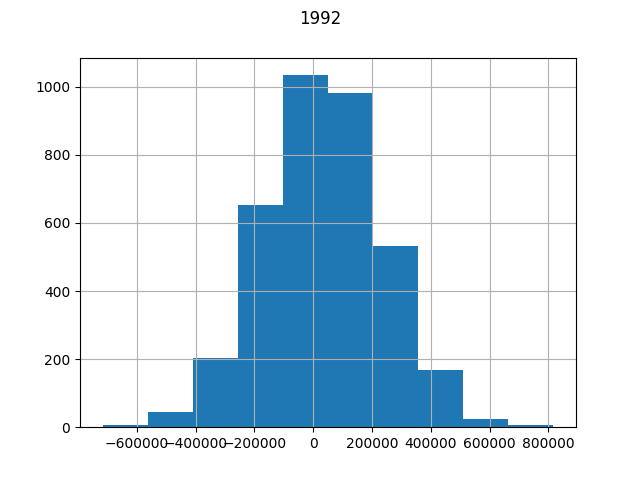

<IPython.core.display.Javascript object>


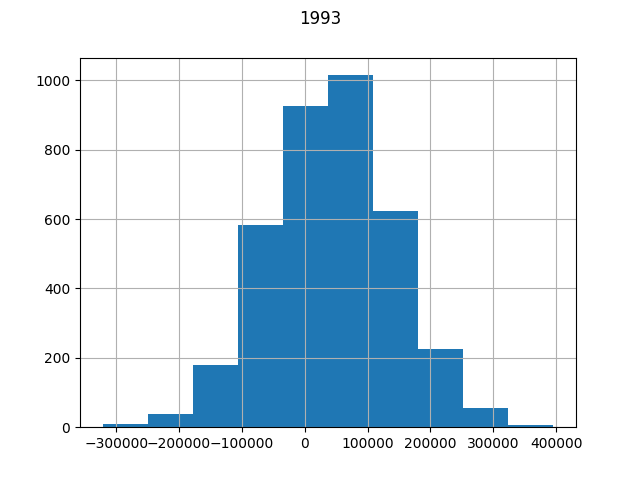

<IPython.core.display.Javascript object>


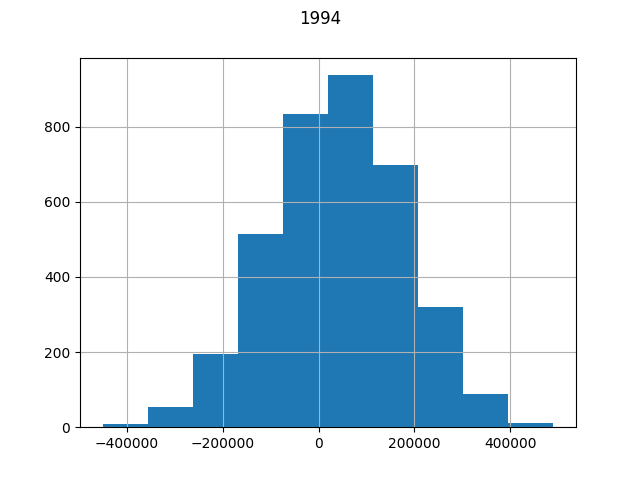

<IPython.core.display.Javascript object>


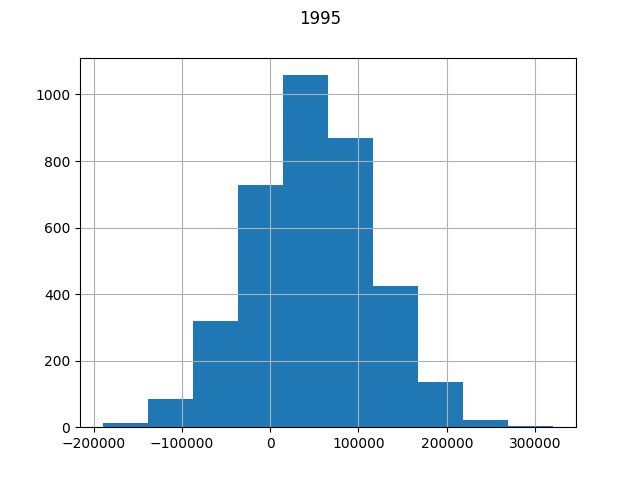

In [36]:
dct=OrderedDict( [('darkblue','-100%'), 
                  ('blue','-80%'), 
                  ('lightblue','-60%'), 
                  ('cyan','-40%'), 
                  ('lightcyan','-20%'), 
                  ('lightcoral','20%'), 
                  ('coral','40%'), 
                  ('red','60%'), 
                  ('firebrick','80%'), 
                  ('darkred','100%')] )

class Cursor(object):
    _df = None
    _bl = None
    _colors = list(reversed(dct.keys()))
    _num_bins=8
    
    def _get_color(self, d_series, val):
        s=d_series[['ci95_hi', 'ci95_lo']]
        s['val']=val
        s=pd.cut(s, bins=self._num_bins, labels=list(range(self._num_bins)), include_lowest=False, right=True)
        return self._colors[s['val']+1]
    
    def __init__(self, ax, dataFrame, bars):
        self._df = dataFrame
        self._bl = bars
        self.ax = ax
        self.lx = ax.axhline(color='red')
        self.label = None;
    def mouse_move(self, event):
        if not event.inaxes:
            return
        x, y = event.xdata, event.ydata
        self.lx.set_ydata(y)
        if self.label is not None:
            self.label.set_visible(False)
        self.label = ax.text(0,y, "{:.0f}".format(y), color="red", ha="right", va="center")
        for index, row in self._df.iterrows():
            if row['ci95_hi']<y:
                self._bl[self._df.index.get_loc(index)].set_color(self._colors[-1])
                continue
            if row['ci95_lo']>y:
                self._bl[self._df.index.get_loc(index)].set_color(self._colors[0])
                continue
            
            self._bl[self._df.index.get_loc(index)].set_color(self._get_color(row, y))
        plt.draw()
for index, row in df.iterrows():
    fig = plt.figure()
    fig.suptitle(index)
    row.hist()

<IPython.core.display.Javascript object>


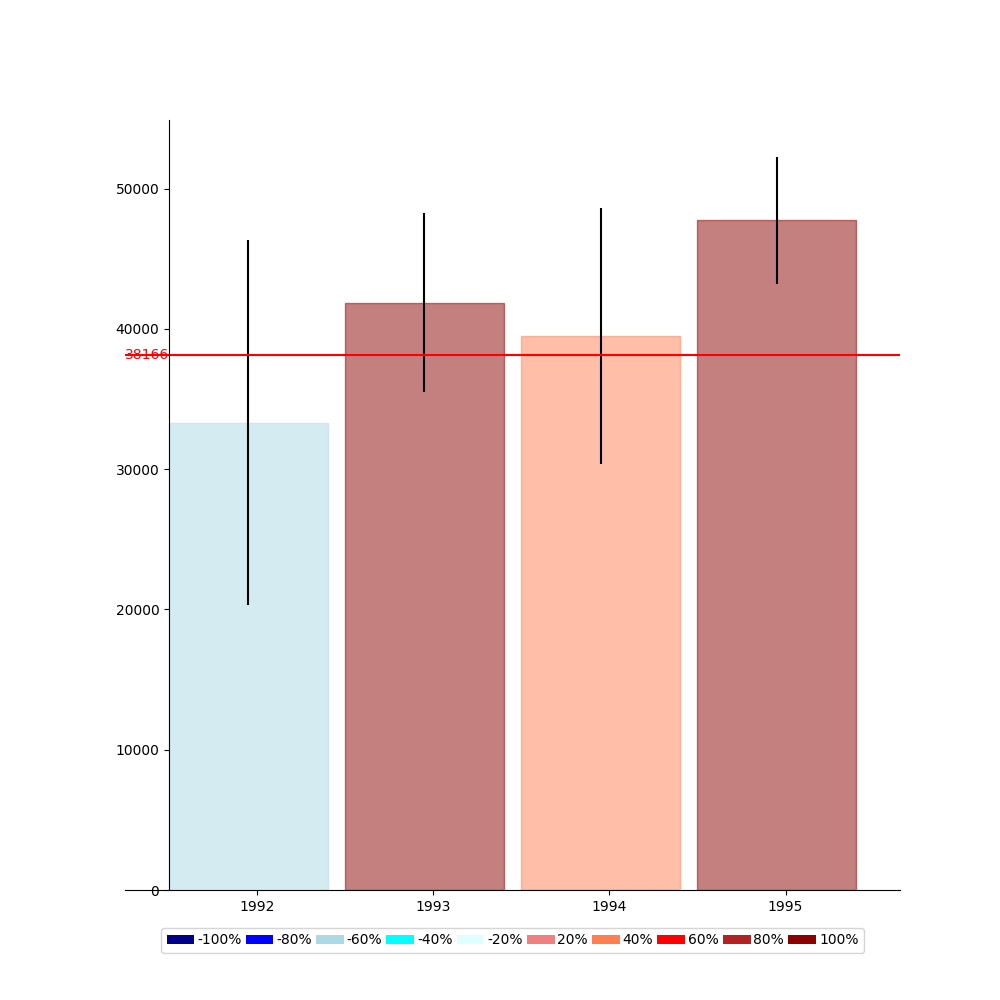

7

In [37]:
fig = plt.figure()
ax, barlist = baseplot(df)

# Create Legend
bars_leg=[]
for k, v in dct.items():
    p=Rectangle((0, 0), 1, 1, fc=k, label=v)
    bars_leg.append(p)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.04), 
           handles=bars_leg, ncol=len(bars_leg), columnspacing=0.3, handletextpad=0.2, fontsize=10)

plt.show()

hcursor = Cursor(ax, df, barlist)
plt.connect('motion_notify_event', hcursor.mouse_move)
